# 1 Introduction
## 1.1 Summary
Kerala is a state of India. Wikipedia describes Kerala (n.d.) contributes massive pepper and natural rubber to the total national output. The agricultural sector, coconut, tea, coffee, cashew and spices are important in this region. Thus, well predicting the rainfall in Kerala would benefit the agriculture industry to make a better plan and possibly increase the output.

This analysis explores the data to see the current situation in Kerala. The next step will try to understand the difficulty of predicting the rainfall in this area and then choose a better method. The expected prediction accuracy should be at least higher than 60%; otherwise, it will cause a negative effect if the prediction is around or lower than 50% accuracy.

## 1.2 Analytics Tool and Dataset
This report uses Python as the analytics tool. The given dataset contains the monthly rainfall precipitation, annual precipitation, and the annual precipitation split into 4 different seasons, JF (Jan-Feb), MAM (Mar-May), JJAS (Jun-Sep), and OND (Oct-Dec), from 1901 to 2017. Total 117 rows and 19 columns as in the dataset.

# 2 Prepare
## 2.1 Analysis Plan
The analysis plan is to answer the questions.

1. What is the rainfall situation in Kerala?
2. Is any difficulty in predicting the rainfall?
3. What prediction method would help, and how accurate the prediction is?

## 2.2 Performance Metrics
This analysis will use the below metrics to evaluate whether the method is suitable for this rainfall prediction.

1. R-Squared - R-squared measures the proportion of the variance for a dependent variable explained by another independent variable or variables in a regression model (Fernondo, 2021).
2. Accuracy - An accuracy number tells how good the model is able to correctly predict data points out of all the data points (Deep AI, n.d.).
3. Confusion Matrix - Data School (2014) explains that a confusion matrix shows a table describing the performance of a classification model on a set of test data for which the true values are known.
4. MAE and RMSE - Root Mean Squared Error (RMSE)and Mean Absolute Error (MAE) are used for evaluating Regression Models. These metrics indicate the deviation from the actual values and how accurate the predictions are (Acharya, 2021). The lower errors, the better accuracy.

## 2.3  Method
The analysis follows the steps as below.

1. Review the data structure and clean it if it is necessary.
2. Proceeding Exploratory Data Analysis to review the rainfall situation.
3. Predict the rainfall by seasonal factors and then seek other methods to improve the prediction.
4. Use classification methods to predict and evaluate the performance.
5. Use regression models to predict and review the outputs.

# 3 Process
## 3.1 Exploratory Data Analysis
This section involves the preparation of the dataset, including data cleansing. Then, an EDA (Exploratory Data Analysis) will help understand the main characteristics of the dataset. Further analysis would be based on the findings from the EDA.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rainfall-in-kerala-from-19012017/Kerala-Rainfall-Historical.csv


In [2]:
# import the packages for this EDA section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

In [3]:
# the data set contains 117 rows and 19 columns
df = pd.read_csv('../input/rainfall-in-kerala-from-19012017/Kerala-Rainfall-Historical.csv')
print(df.shape)
df.head()

(117, 19)


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Kerala,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1
1,Kerala,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2
2,Kerala,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1
3,Kerala,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3
4,Kerala,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1


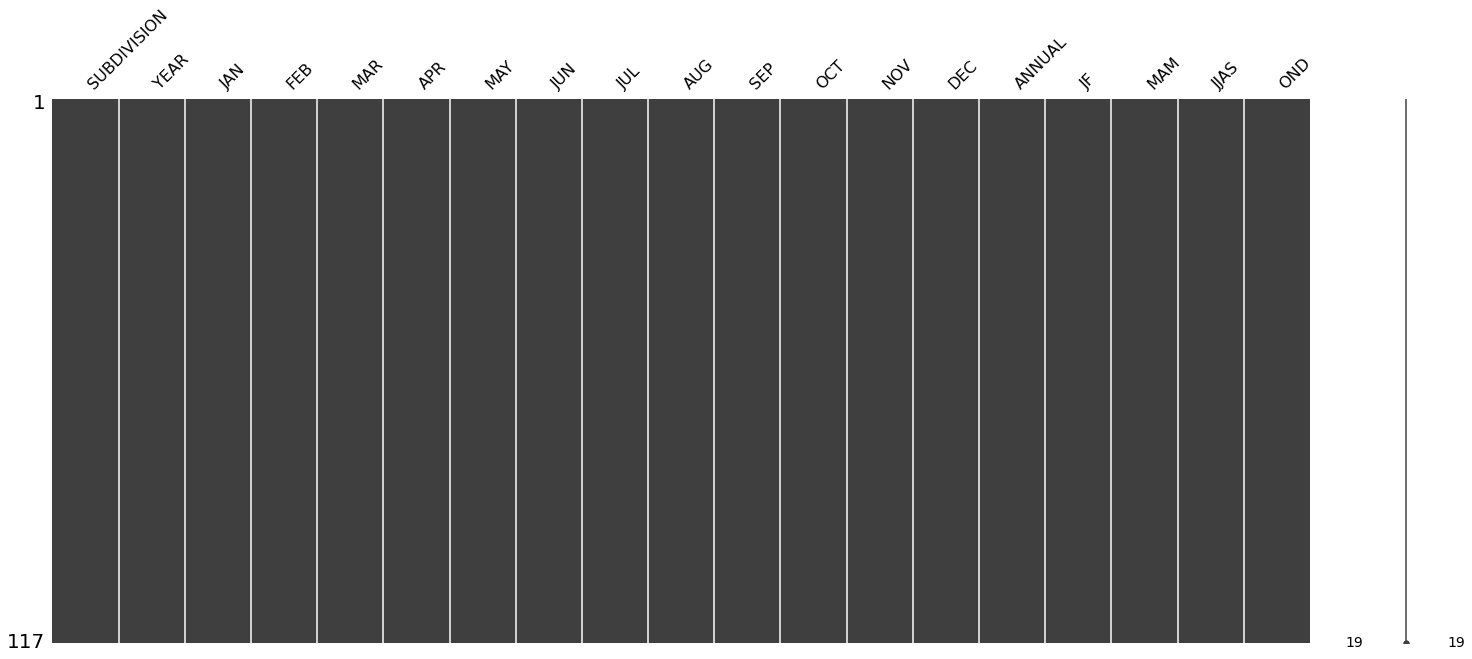

In [4]:
# review whether there is a missing value
msno.matrix(df)
plt.show()

After the review, there is no missing value in this dataset. Thus, Here will go forward to the EDA section.

In [5]:
# prepare dataframes for plots
df_month = df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
df_season = df[['YEAR', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND']]

In [6]:
bar_ann = round(df_season['ANNUAL'].mean(), 2)
bar_jf = round(df_season['JF'].mean(), 2)
bar_mam = round(df_season['MAM'].mean(), 2)
bar_jjas = round(df_season['JJAS'].mean(), 2)
bar_ond = round(df_season['OND'].mean(), 2)

x = ['Annual', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
y = [bar_ann, bar_jf, bar_mam, bar_jjas, bar_ond]

fig = go.Figure(data=[go.Bar(x=x, y=y, text=y, textposition='auto',
            hovertext=['Average Polarity', 'Average Polarity', 'Average Polarity', 'Average Polarity'])])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text="Average Precipitation in Different Seasons", title_x=0.5)
fig.update_xaxes(
        title_text = "Seasons",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "Average Precipitation (mms)",
        title_font = {"size": 16},
        title_standoff = 12)
fig.show()

The average precipitation of JAAS (June to September) is tremendously higher than in other seasons. In contrast, the precipitation of January and February is quite low than others.

In [7]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_month['JAN'],
    name="Jan",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['FEB'],
    name="Feb",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['MAR'],
    name="Mar",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['APR'],
    name="Apr",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['MAY'],
    name="May",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['JUN'],
    name="Jun",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['JUL'],
    name="Jul",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['AUG'],
    name="Aug",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['SEP'],
    name="Sep",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['OCT'],
    name="Oct",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['NOV'],
    name="Nov",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['DEC'],
    name="Dec",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all',
    marker_color='#3D9970',
    line_color='#3D9970'
))
fig.update_xaxes(
        title_text = "Month",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "Precipitation (mms)",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_layout(title_text="Monthly Precipitation", title_x=0.5)
fig.show()

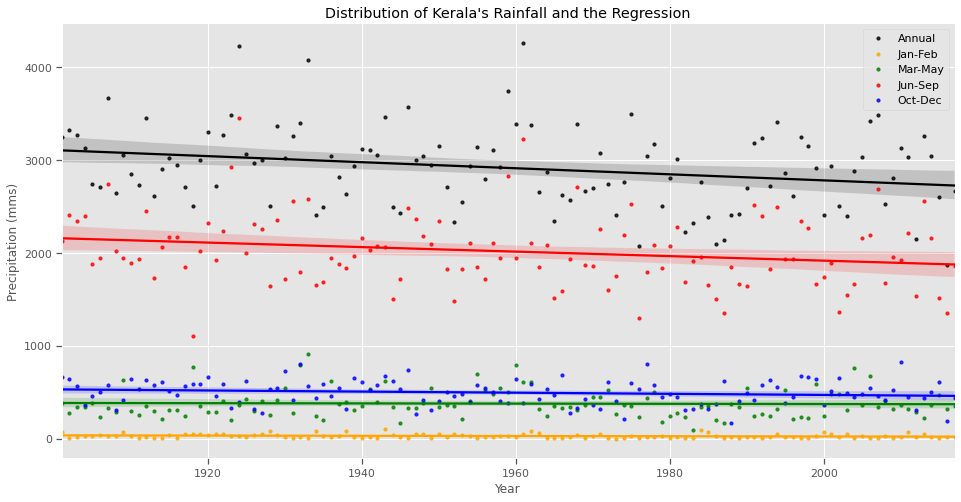

In [8]:
sns.set_context("notebook")
plt.style.use('ggplot') 
plt.subplots(figsize=(16, 8))
g1=sns.regplot(data=df_season, x='YEAR', y='ANNUAL', order=1, ci=95, label='Annual', 
               marker='o', scatter_kws={'s':10}, color='black')
g2=sns.regplot(data=df_season, x='YEAR', y='JF', order=1, ci=95, label='Jan-Feb', 
               marker='o', scatter_kws={'s':10}, color='orange')
g3=sns.regplot(data=df_season, x='YEAR', y='MAM', order=1, ci=95, label='Mar-May', 
               marker='o', scatter_kws={'s':10}, color='green')
g4=sns.regplot(data=df_season, x='YEAR', y='JJAS', order=1, ci=95, label='Jun-Sep', 
               marker='o', scatter_kws={'s':10}, color='red')
g5=sns.regplot(data=df_season, x='YEAR', y='OND', order=1, ci=95, label='Oct-Dec', 
               marker='o', scatter_kws={'s':10}, color='blue')
g1.set_title("Distribution of Kerala's Rainfall and the Regression", y=1)
g1.set(xlabel='Year', ylabel='Precipitation (mms)')
plt.xticks(rotation=0)
plt.legend()
sns.set_context("paper")
plt.show()

The regression lines show there is a trend that the rainfall in JJAS (Jun-Sep) season slightly decrease. It also causes the trend of the annual precipitation to go down. However, the dots spread a wide range from the regression lines. It tells the same message as the insight from the previous box plot. The precipitation in different seasons varies from year to year.

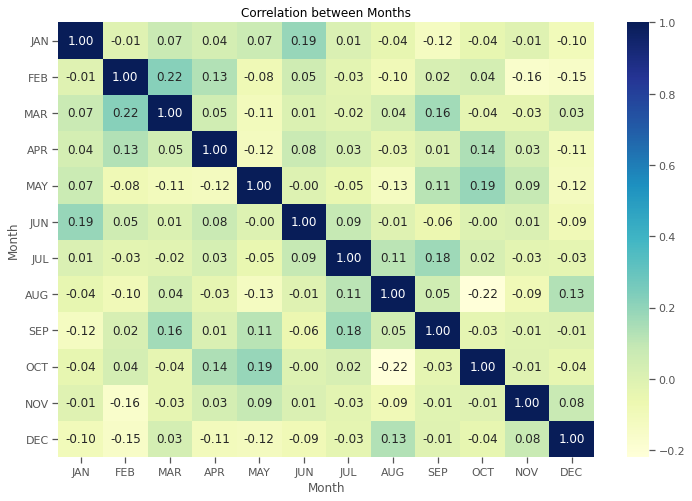

In [9]:
corr = df_month.drop('YEAR', axis=1).corr()

sns.set_context("notebook")
plt.subplots(figsize=(12, 8))
g1 = sns.heatmap(corr, cmap = 'YlGnBu', annot=True, fmt='.2f')
g1.set_title("Correlation between Months", y=1)
plt.xlabel('Month')
plt.ylabel('Month')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

This heatmap shows the correlation coefficient of the monthly precipitation between months. It is clear there is no significant correlation between months. Only the correlation, 0.22, between February and March looks higher, but it is still too low. In general, the heatmap tells predicting monthly precipitation by correlation is not quite ideal.

In [10]:
data = df.copy(deep=True)

df_trend = pd.melt(data, id_vars = ['YEAR'], 
                   value_vars = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                                 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC'], 
                   var_name='month', value_name='mms')
print(df_trend.shape)
df_trend.head()

(1404, 3)


,YEAR,month,mms
0,1901,JAN,28.7
1,1902,JAN,6.7
2,1903,JAN,3.2
3,1904,JAN,23.7
4,1905,JAN,1.2


In [11]:
df_trend['date'] = df_trend['YEAR'].astype('str') + '-' + df_trend['month'] + '-01'
df_trend['date']= pd.to_datetime(df_trend['date'])
df_sorted = df_trend.sort_values('date')

df_sorted = df_sorted.reset_index()
df_sorted = df_sorted.drop('index', axis=1)
df_sorted['month_no'] = df_sorted['date'].dt.strftime('%m')
month_int = df_sorted.loc[:, 'month_no'].astype('int')
df_sorted = df_sorted.assign(month_no = month_int)

annual_list, jf_list, mam_list, jjas_list, ond_list = [], [], [], [], []

for year in range(1901, 2018):
    ann = df.loc[df['YEAR']==year, 'ANNUAL']
    jf = df.loc[df['YEAR']==year, 'JF']
    mam = df.loc[df['YEAR']==year, 'MAM']
    jjas = df.loc[df['YEAR']==year, 'JJAS']
    ond = df.loc[df['YEAR']==year, 'OND']
    for year_loop in range(12):
        annual_list.append(float(ann))
        jf_list.append(float(jf))
        mam_list.append(float(mam))
        jjas_list.append(float(jjas))
        ond_list.append(float(ond))

df_sorted = df_sorted.assign(annual=annual_list)
df_sorted = df_sorted.assign(jf=jf_list)
df_sorted = df_sorted.assign(mam=mam_list)
df_sorted = df_sorted.assign(jjas=jjas_list)
df_sorted = df_sorted.assign(ond=ond_list)
df_sorted

,YEAR,month,mms,date,month_no,annual,jf,mam,jjas,ond
0,1901,JAN,28.7,1901-01-01,1,3248.6,73.4,386.2,2122.8,666.1
1,1901,FEB,44.7,1901-02-01,2,3248.6,73.4,386.2,2122.8,666.1
2,1901,MAR,51.6,1901-03-01,3,3248.6,73.4,386.2,2122.8,666.1
3,1901,APR,160.0,1901-04-01,4,3248.6,73.4,386.2,2122.8,666.1
4,1901,MAY,174.7,1901-05-01,5,3248.6,73.4,386.2,2122.8,666.1
...,...,...,...,...,...,...,...,...,...,...
1399,2017,AUG,462.6,2017-08-01,8,2664.9,13.0,353.9,1856.5,441.5
1400,2017,SEP,435.5,2017-09-01,9,2664.9,13.0,353.9,1856.5,441.5
1401,2017,OCT,228.0,2017-10-01,10,2664.9,13.0,353.9,1856.5,441.5
1402,2017,NOV,152.1,2017-11-01,11,2664.9,13.0,353.9,1856.5,441.5


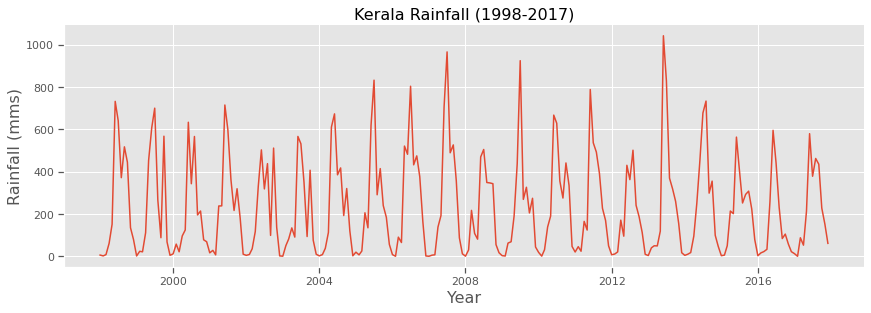

In [12]:
sns.relplot(data=df_sorted[-240:], x='date', y='mms', kind='line', height=4, aspect=3)
plt.title("Kerala Rainfall (1998-2017)", fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Rainfall (mms)', fontsize=16)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

This line plot shows the rainfall in Kerala from 1998 to 2017. It seems the precipitation increases up and down periodically every year. It might be a piece of useful information for this analysis to predict the rainfall.

## 3.2  Exploratory Data Analysis Summary
The given dataset has 119 rows and 17 columns without missing data. Regarding the visualization, here are the insights below.

1. The JAAS Season has significant higher precipitation than other seasons.
2. The rainfall variance in the same month of different years spreads in a huge range.
3. Although the regression line shows the rainfall in the JJAS season slightly decrease, the scatter plot demonstrates the difficulty of predicting by regression due to the variance.
4. The heatmap tells that predicting by the correlation between months is not quite ideal.
5. This line plot shows a periodic pattern that the rainfall increases up and down in certain months.

Due to viewpoint 5, it might be viable to predict by seasonal factors. Thus, the next section will start prediction analysis in regards to the insights from the EDA.

# 4 Analyze
## 4.1 Seasonal Factor Analysis
If the precipitation can be affected by a seasonal factor, it is possible to predict by using the factor. The step would be as follows.

1. Get the moving average numbers
2. Calculate the seasonal factors for every month
3. Get the average seasonal factors to fit back into the months
4. Use the average factors to get deseasonalized numbers
5. Predict a number by using the regression line generated by the deseasonalized numbers
6. Seasonalize the prediction generated by the deseasonalized numbers to get final results

These are the steps to predict by seasonal factors. However, the viability depends on how good the deseasonalized model is. This analysis will evaluate the model by the R-Squared number of the regression generated by deseasonalized numbers.

### 4.1.1  Optimize The Model by All Data

In [13]:
# get 12 month moving average numbers
for index in range(len(df_sorted)-11):
    df_sorted.loc[index+11, 'mov_avg'] = df_sorted[index:index+12]['mms'].mean()
df_sorted.head(16)

,YEAR,month,mms,date,month_no,annual,jf,mam,jjas,ond,mov_avg
0,1901,JAN,28.7,1901-01-01,1,3248.6,73.4,386.2,2122.8,666.1,NaN
1,1901,FEB,44.7,1901-02-01,2,3248.6,73.4,386.2,2122.8,666.1,NaN
2,1901,MAR,51.6,1901-03-01,3,3248.6,73.4,386.2,2122.8,666.1,NaN
3,1901,APR,160.0,1901-04-01,4,3248.6,73.4,386.2,2122.8,666.1,NaN
4,1901,MAY,174.7,1901-05-01,5,3248.6,73.4,386.2,2122.8,666.1,NaN
5,1901,JUN,824.6,1901-06-01,6,3248.6,73.4,386.2,2122.8,666.1,NaN
6,1901,JUL,743.0,1901-07-01,7,3248.6,73.4,386.2,2122.8,666.1,NaN
7,1901,AUG,357.5,1901-08-01,8,3248.6,73.4,386.2,2122.8,666.1,NaN
8,1901,SEP,197.7,1901-09-01,9,3248.6,73.4,386.2,2122.8,666.1,NaN
9,1901,OCT,266.9,1901-10-01,10,3248.6,73.4,386.2,2122.8,666.1,NaN


In [14]:
# calculate the seasonal factors for every month
df_sorted['ratio_ma'] = df_sorted['mms'] / df_sorted['mov_avg']
df_sorted

,YEAR,month,mms,date,month_no,annual,jf,mam,jjas,ond,mov_avg,ratio_ma
0,1901,JAN,28.7,1901-01-01,1,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN
1,1901,FEB,44.7,1901-02-01,2,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN
2,1901,MAR,51.6,1901-03-01,3,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN
3,1901,APR,160.0,1901-04-01,4,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN
4,1901,MAY,174.7,1901-05-01,5,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2017,AUG,462.6,2017-08-01,8,2664.9,13.0,353.9,1856.5,441.5,171.408333,2.698819
1400,2017,SEP,435.5,2017-09-01,9,2664.9,13.0,353.9,1856.5,441.5,200.691667,2.169995
1401,2017,OCT,228.0,2017-10-01,10,2664.9,13.0,353.9,1856.5,441.5,210.933333,1.080910
1402,2017,NOV,152.1,2017-11-01,11,2664.9,13.0,353.9,1856.5,441.5,218.783333,0.695208


In [15]:
# get the average seasonal factors to fit back into the months
for month in range(12):
    rate_avg = df_sorted.loc[df_sorted['month_no'].astype('int') == month+1, 'ratio_ma'].mean()
    df_sorted.loc[df_sorted['month_no'].astype('int') == month+1, 'rate'] = rate_avg
df_sorted

,YEAR,month,mms,date,month_no,annual,jf,mam,jjas,ond,mov_avg,ratio_ma,rate
0,1901,JAN,28.7,1901-01-01,1,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.049417
1,1901,FEB,44.7,1901-02-01,2,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.062845
2,1901,MAR,51.6,1901-03-01,3,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.154157
3,1901,APR,160.0,1901-04-01,4,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.453575
4,1901,MAY,174.7,1901-05-01,5,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.930244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2017,AUG,462.6,2017-08-01,8,2664.9,13.0,353.9,1856.5,441.5,171.408333,2.698819,1.738357
1400,2017,SEP,435.5,2017-09-01,9,2664.9,13.0,353.9,1856.5,441.5,200.691667,2.169995,1.009300
1401,2017,OCT,228.0,2017-10-01,10,2664.9,13.0,353.9,1856.5,441.5,210.933333,1.080910,1.216487
1402,2017,NOV,152.1,2017-11-01,11,2664.9,13.0,353.9,1856.5,441.5,218.783333,0.695208,0.669488


In [16]:
# use the average factors to get deseasonalized numbers
df_sorted['deseasonal'] = df_sorted['mms'] / df_sorted['rate']
df_sorted.head(16)

,YEAR,month,mms,date,month_no,annual,jf,mam,jjas,ond,mov_avg,ratio_ma,rate,deseasonal
0,1901,JAN,28.7,1901-01-01,1,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.049417,580.776307
1,1901,FEB,44.7,1901-02-01,2,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.062845,711.271572
2,1901,MAR,51.6,1901-03-01,3,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.154157,334.723229
3,1901,APR,160.0,1901-04-01,4,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.453575,352.753471
4,1901,MAY,174.7,1901-05-01,5,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,0.930244,187.800126
5,1901,JUN,824.6,1901-06-01,6,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,2.694557,306.024385
6,1901,JUL,743.0,1901-07-01,7,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,2.847874,260.896381
7,1901,AUG,357.5,1901-08-01,8,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,1.738357,205.653905
8,1901,SEP,197.7,1901-09-01,9,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,1.009300,195.878426
9,1901,OCT,266.9,1901-10-01,10,3248.6,73.4,386.2,2122.8,666.1,NaN,NaN,1.216487,219.402349


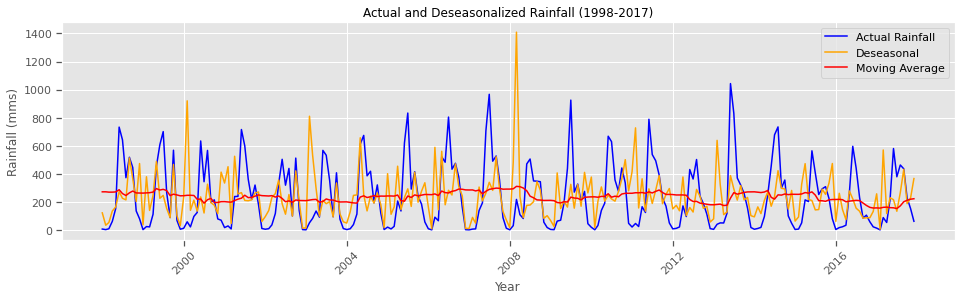

In [17]:
sns.set_context("notebook")
plt.subplots(figsize=(16, 4))
g1=sns.lineplot(data=df_sorted[-240:], x='date', y='mms', label='Actual Rainfall', color='blue')
g2=sns.lineplot(data=df_sorted[-240:], x='date', y='deseasonal', label='Deseasonal', color='orange')
g3=sns.lineplot(data=df_sorted[-240:], x='date', y='mov_avg', label='Moving Average', color='red')
g1.set_title('Actual and Deseasonalized Rainfall (1998-2017)', y=1)
g1.set(xlabel='Year', ylabel='Rainfall (mms)')
plt.xticks(rotation=44)
plt.legend()
plt.show()

The line plot demonstrates the deseasonalized rainfall has many outliners, although the moving average numbers go smoothly. This situation would cause a problem to make a further prediction. Thus, in order to evaluate whether this seasonal factor analysis is viable. Checking the R-squared number of the regression is needed.

In [18]:
df_sorted['period'] = df_sorted.index + 1

X_train = df_sorted['period']
y_train = df_sorted['mms']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Original Rainfall')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)

Original Rainfall
Intercept: 257.9273543871193, Coefficient: -0.021455734565720405
R-Squared: 0.0011508387916199236


In [19]:
X_train = df_sorted['period']
y_train = df_sorted['deseasonal']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Deseasonalized Rainfall')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)
print(olsreg.summary())

Deseasonalized Rainfall
Intercept: 264.4360132473956, Coefficient: -0.03079209609350826
R-Squared: 0.0055123721625868205
                            OLS Regression Results                            
Dep. Variable:             deseasonal   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.771
Date:                Sun, 22 Aug 2021   Prob (F-statistic):            0.00538
Time:                        20:11:55   Log-Likelihood:                -9183.1
No. Observations:                1404   AIC:                         1.837e+04
Df Residuals:                    1402   BIC:                         1.838e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

Comparing the R-squared number of the original model to the deseasonalized model, the improvement only increases from 0.001 to 0.006. The optimized regression can only explain 0.6% of variables, which is very bad. Thus, the next step is to try another way to optimize this prediction model.

### 4.1.2  Optimize The Model by 4 Seasons

In [20]:
def get_mov_avg(df, column, period, add_column):
    df[add_column] = df[column].rolling(period).mean()
    return df

season_list = ['JF', 'MAM', 'JJAS', 'OND']
df_season = pd.melt(data, id_vars = ['YEAR'], 
                   value_vars = season_list, 
                   var_name='season', value_name='q_mms')

for i in range(len(season_list)):
    df_season.loc[df_season['season']==season_list[i], 'season_no'] = i+1

df_season['season_no'] = df_season['season_no'].astype('int').astype('str')
df_season['year_s'] = df_season['YEAR'].astype('str')+'-'+'s'+df_season['season_no']
season_sorted = df_season.sort_values('year_s').reset_index(drop=True)

get_mov_avg(season_sorted, 'q_mms', 4, 'mov_avg')

season_sorted['ratio_s'] = season_sorted['q_mms'] / season_sorted['mov_avg']

for season in range(4):
    rate_avg = season_sorted.loc[season_sorted['season_no'].astype('int') == season+1, 'ratio_s'].mean()
    season_sorted.loc[season_sorted['season_no'].astype('int') == season+1, 'rate'] = rate_avg

season_sorted['deseasonal'] = season_sorted['q_mms'] / season_sorted['rate']

season_sorted['period'] = season_sorted.index+1

season_sorted

,YEAR,season,q_mms,season_no,year_s,mov_avg,ratio_s,rate,deseasonal,period
0,1901,JF,73.4,1,1901-s1,NaN,NaN,0.037439,1960.515942,1
1,1901,MAM,386.2,2,1901-s2,NaN,NaN,0.513478,752.125969,2
2,1901,JJAS,2122.8,3,1901-s3,NaN,NaN,2.759032,769.400333,3
3,1901,OND,666.1,4,1901-s4,812.125,0.820194,0.685043,972.348395,4
4,1902,JF,9.3,1,1902-s1,796.100,0.011682,0.037439,248.403246,5
...,...,...,...,...,...,...,...,...,...,...
463,2016,OND,185.0,4,2016-s4,467.700,0.395553,0.685043,270.056227,464
464,2017,JF,13.0,1,2017-s1,466.125,0.027890,0.037439,347.230344,465
465,2017,MAM,353.9,2,2017-s2,476.050,0.743409,0.513478,689.221596,466
466,2017,JJAS,1856.5,3,2017-s3,602.100,3.083375,2.759032,672.880968,467


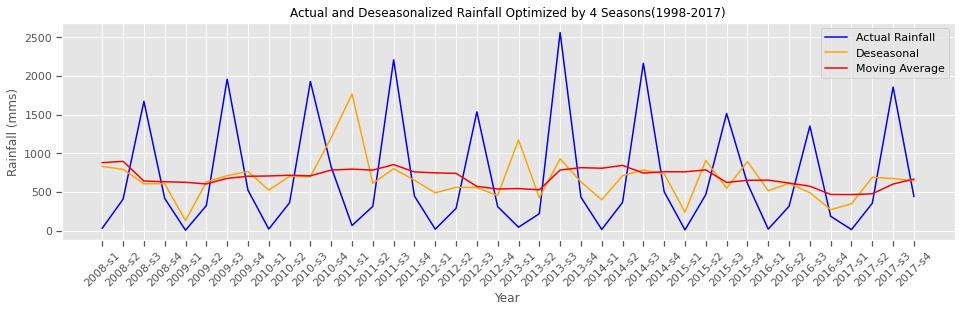

In [21]:
sns.set_context("notebook")
plt.subplots(figsize=(16, 4))
g1=sns.lineplot(data=season_sorted[-40:], x='year_s', y='q_mms', ci=None, label='Actual Rainfall', color='blue')
g2=sns.lineplot(data=season_sorted[-40:], x='year_s', y='deseasonal', ci=95, label='Deseasonal', color='orange')
g3=sns.lineplot(data=season_sorted[-40:], x='year_s', y='mov_avg', label='Moving Average', color='red')
g1.set_title('Actual and Deseasonalized Rainfall Optimized by 4 Seasons(1998-2017)', y=1)
g1.set(xlabel='Year', ylabel='Rainfall (mms)')
plt.xticks(rotation=44)
plt.legend()
sns.set_context("paper")
plt.show()

In [22]:
X_train = season_sorted['period']
y_train = season_sorted['q_mms']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Original Rainfall Optimized by 4 Seasons')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)

Original Rainfall Optimized by 4 Seasons
Intercept: 771.4829059829065, Coefficient: -0.18305177409655032
R-Squared: 0.0009721950560948045


In [23]:
X_train = season_sorted['period']
y_train = season_sorted['deseasonal']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Deseasonized Rainfall Optimized by 4 Seasons')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)
print(olsreg.summary())

Deseasonized Rainfall Optimized by 4 Seasons
Intercept: 805.9389988267633, Coefficient: -0.322452833410995
R-Squared: 0.01547985278041708
                            OLS Regression Results                            
Dep. Variable:             deseasonal   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     7.327
Date:                Sun, 22 Aug 2021   Prob (F-statistic):            0.00704
Time:                        20:11:56   Log-Likelihood:                -3402.1
No. Observations:                 468   AIC:                             6808.
Df Residuals:                     466   BIC:                             6817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

The optimization is still not able to improve the prediction model, even though we choose to predict a seasonal rainfall instead of monthly rainfall. The R-squared number only increases from 0.001 to 0.015. It demonstrates predicting the rainfall by seasonal factors completely fails. As a result, this analysis will change to predict by machine learning algorithms.

## 4.2  Machine Learning Method
Since the previous prediction method based on seasonal factors was not quite ideal, this section will use machine learning methods to build a prediction model. This analysis will compare the predictions from classification and regression models.

### 4.2.1  Predict by Classifiers
The steps of classification would be as below.

1. Prepare a dataframe with needed information for training the models
2. Label the rainfall into 4 levels of ranges
3. Fit different models with GridSearch and see the accuracy
4. Review the accuracy scores and confusion matrix to ensure whether the results are acceptable

Ideally, this analysis chooses the below columns to build up the data for training the machine learning models. Moreover, since the moving average method made some missing variables in 1901, the dataframe drops the rows.

- Year
- Month
- Precipitation (mms)
- Moving average number
- Annual rainfall from the last year
- JF (Jan-Feb) season rainfall from the last year
- MAM (Mar-May) season rainfall from the last year
- JJAS (Jun-Sep) season rainfall from the last year
- OND (Oct-Dec) season rainfall from the last year

In [24]:
df_last = df_sorted[df_sorted['YEAR']!=1901]

annual_list_last, jf_list_last, mam_list_last, jjas_list_last, ond_list_last = [], [], [], [], []

for year in range(1901, 2017):
    ann_last = df.loc[df['YEAR']==year, 'ANNUAL']
    jf_last = df.loc[df['YEAR']==year, 'JF']
    mam_last = df.loc[df['YEAR']==year, 'MAM']
    jjas_last = df.loc[df['YEAR']==year, 'JJAS']
    ond_last = df.loc[df['YEAR']==year, 'OND']
    for year_loop in range(12):
        annual_list_last.append(float(ann_last))
        jf_list_last.append(float(jf_last))
        mam_list_last.append(float(mam_last))
        jjas_list_last.append(float(jjas_last))
        ond_list_last.append(float(ond_last))

df_last = df_last.assign(last_annual=annual_list_last)
df_last = df_last.assign(last_jf=jf_list_last)
df_last = df_last.assign(last_mam=mam_list_last)
df_last = df_last.assign(last_jjas=jjas_list_last)
df_last = df_last.assign(last_ond=ond_list_last)

df_ml = df_last[['YEAR', 'mms', 'month_no', 'mov_avg', 'last_annual', 
                 'last_jf', 'last_mam', 'last_jjas', 'last_ond']]
df_ml = df_ml.reset_index(drop=True)
df_ml

,YEAR,mms,month_no,mov_avg,last_annual,last_jf,last_mam,last_jjas,last_ond
0,1902,6.7,1,268.883333,3248.6,73.4,386.2,2122.8,666.1
1,1902,2.6,2,265.375000,3248.6,73.4,386.2,2122.8,666.1
2,1902,57.3,3,265.850000,3248.6,73.4,386.2,2122.8,666.1
3,1902,83.9,4,259.508333,3248.6,73.4,386.2,2122.8,666.1
4,1902,134.5,5,256.158333,3248.6,73.4,386.2,2122.8,666.1
...,...,...,...,...,...,...,...,...,...
1387,2017,462.6,8,171.408333,1870.9,19.3,314.2,1352.3,185.0
1388,2017,435.5,9,200.691667,1870.9,19.3,314.2,1352.3,185.0
1389,2017,228.0,10,210.933333,1870.9,19.3,314.2,1352.3,185.0
1390,2017,152.1,11,218.783333,1870.9,19.3,314.2,1352.3,185.0


In [25]:
# label the rainfall records into 4 ranges
df_ml['mms_level']=pd.qcut(df_ml['mms'].rank(method='first'), q=4, labels=range(1,5))
print('Level 4 - Above 25%: Above {} mms'.format(df_ml['mms'].quantile(q = 0.75)))
print('Level 3 - 75%-50%: {} - {} mms'.format(df_ml['mms'].quantile(q = 0.75), df_ml['mms'].quantile(q = 0.5)))
print('Level 2 - 50%-25%: {} - {} mms'.format(df_ml['mms'].quantile(q = 0.5), df_ml['mms'].quantile(q = 0.25)))
print('Level 1 - Below 25%: Below {} mms'.format(df_ml['mms'].quantile(q = 0.25)))
df_ml

Level 4 - Above 25%: Above 374.4 mms
Level 3 - 75%-50%: 374.4 - 152.55 mms
Level 2 - 50%-25%: 152.55 - 33.75 mms
Level 1 - Below 25%: Below 33.75 mms


,YEAR,mms,month_no,mov_avg,last_annual,last_jf,last_mam,last_jjas,last_ond,mms_level
0,1902,6.7,1,268.883333,3248.6,73.4,386.2,2122.8,666.1,1
1,1902,2.6,2,265.375000,3248.6,73.4,386.2,2122.8,666.1,1
2,1902,57.3,3,265.850000,3248.6,73.4,386.2,2122.8,666.1,2
3,1902,83.9,4,259.508333,3248.6,73.4,386.2,2122.8,666.1,2
4,1902,134.5,5,256.158333,3248.6,73.4,386.2,2122.8,666.1,2
...,...,...,...,...,...,...,...,...,...,...
1387,2017,462.6,8,171.408333,1870.9,19.3,314.2,1352.3,185.0,4
1388,2017,435.5,9,200.691667,1870.9,19.3,314.2,1352.3,185.0,4
1389,2017,228.0,10,210.933333,1870.9,19.3,314.2,1352.3,185.0,3
1390,2017,152.1,11,218.783333,1870.9,19.3,314.2,1352.3,185.0,2


In [26]:
# import machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

In [27]:
def run_multiclass(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    c_matrix = confusion_matrix(y_test, y_pred)
    c_report = classification_report(y_test, y_pred, digits=5)
    
    print(classification_report(y_test, y_pred, digits=5))
    
    return model, accuracy, c_matrix, c_report

In [28]:
X = df_ml.drop(['mms', 'mms_level'], axis=1)
y = df_ml['mms_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

# GaussianNB
print('GaussianNB:')
params_gnb = {'var_smoothing': 1e-09}
model_gnb = GaussianNB(**params_gnb)
model_gnb, accuracy_gnb, c_matrix_gnb, c_report_gnb = run_multiclass(model_gnb, X_train, y_train, X_test, y_test)

# Random Forest
print('Random Forest:')
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 44}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, c_matrix_rf, c_report_rf = run_multiclass(model_rf, X_train, y_train, X_test, y_test)

# Logistic Regression
print('Logistic Regression:')
params_lr = {'penalty': 'l1', 'solver':'liblinear', 
             'random_state': 44}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, c_matrix_lr, c_report_lr = run_multiclass(model_lr, X_train, y_train, X_test, y_test)

# Decision Tree
print('Decision Tree:')
params_dt = {'max_depth': 16,
             'max_features': "sqrt", 'random_state': 44}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, c_matrix_dt, c_report_dt = run_multiclass(model_dt, X_train, y_train, X_test, y_test)

# LGBM
print('LGBM:')
params_lgb ={'colsample_bytree': 0.95, 'max_depth': 16, 
             'min_split_gain': 0.1, 'n_estimators': 200, 
             'num_leaves': 50, 'reg_alpha': 1.2, 
             'reg_lambda': 1.2, 'subsample': 0.95, 
             'subsample_freq': 20, 'random_state': 44}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, c_matrix_lgb, c_report_lgb = run_multiclass(model_lgb, X_train, y_train, X_test, y_test)

# XGBoost
print('XGBoost:')
params_xgb ={'n_estimators': 500,
            'max_depth': 16, 'random_state': 44}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, c_matrix_xgb, c_report_xgb = run_multiclass(model_xgb, X_train, y_train, X_test, y_test)

GaussianNB:
              precision    recall  f1-score   support

           1    0.67257   0.80000   0.73077        95
           2    0.47222   0.20238   0.28333        84
           3    0.53782   0.72727   0.61836        88
           4    0.81250   0.80247   0.80745        81

    accuracy                        0.63793       348
   macro avg    0.62378   0.63303   0.60998       348
weighted avg    0.62270   0.63793   0.61219       348

Random Forest:
              precision    recall  f1-score   support

           1    0.82927   0.71579   0.76836        95
           2    0.48193   0.47619   0.47904        84
           3    0.54255   0.57955   0.56044        88
           4    0.74157   0.81481   0.77647        81

    accuracy                        0.64655       348
   macro avg    0.64883   0.64659   0.64608       348
weighted avg    0.65251   0.64655   0.64784       348

Logistic Regression:
              precision    recall  f1-score   support

           1    0.58209   0

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



              precision    recall  f1-score   support

           1    0.84146   0.72632   0.77966        95
           2    0.49425   0.51190   0.50292        84
           3    0.57292   0.62500   0.59783        88
           4    0.78313   0.80247   0.79268        81

    accuracy                        0.66667       348
   macro avg    0.67294   0.66642   0.66827       348
weighted avg    0.67617   0.66667   0.66991       348



Looking into these classification reports, the precision scores of 2 models, LGBM and XGBoost, for 4 clusters are all above 50%. It seems these two models are better than the others. However, further evaluation is still needed. Therefore, this analysis will compare the model accuracy of each model.

In [29]:
bar_x = ['GaussianNB', 'Random Forest', 'Logistic Regression', 
     'Decision Tree', 'LGBM', 'XGBoost'] 
bar_y = [accuracy_gnb, accuracy_rf, accuracy_lr, accuracy_dt, accuracy_lgb, accuracy_xgb]
rounded_y = [round(num, 4) for num in bar_y]

fig = px.bar(x=bar_x, y=bar_y, text=rounded_y, title='Accuracy Comparison between Models',
             color=rounded_y, color_continuous_scale='sunsetdark',
             labels={'x':'Machine Learning Models', 'y':'Accuracy Score'}, height=500)
fig.update_layout(title_x=0.5)
fig.show()

Despite LGBM and XGBoost, this bar chart shows the accuracy of GaussianNB and Random Forest look acceptable. Still, LGBM has the highest accuracy score, 70.98%. It could be the model for this Kerala rainfall prediction. In the next part, this analysis will review the confusion matrix and select the best solution.

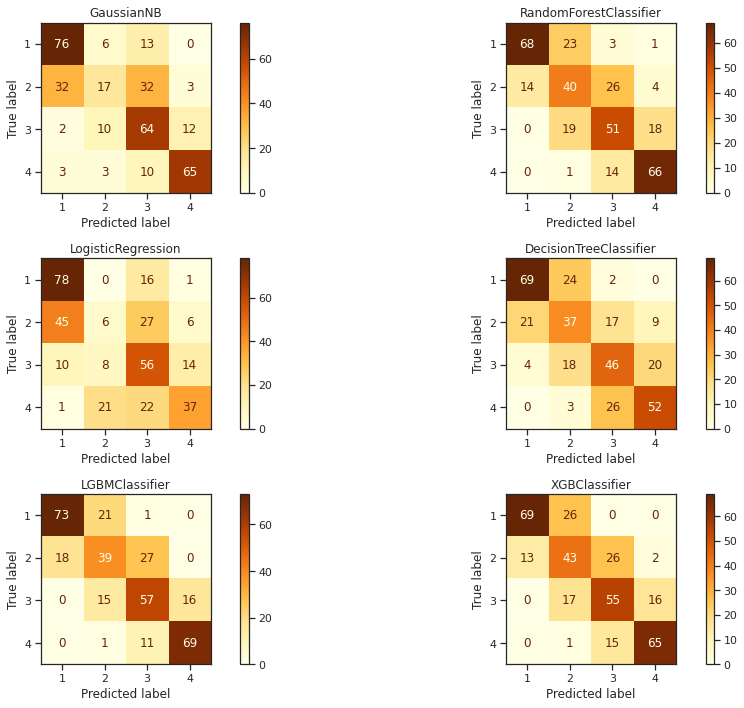

In [32]:
classifiers = [model_gnb, model_rf, model_lr, model_dt, model_lgb, model_xgb]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

plt.style.use('seaborn-white') 
sns.set_context("notebook")
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='YlOrBr')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In regards to the rainfall prediction, the worst situation is that the forecast says the weather is mild, but actually, it causes a natural disaster, such as droughts or floods. Thus, this analysis would like to evaluate the models by these false predictions. One is that the model clusters the rainfall into level 2, level 3, and level 4, but the actual rainfall is level 1, which is a drought month. The other one is that the model clusters the rainfall into level 1, level 2, and level 3, but the actual rainfall is level 4, which floods would happen in the month. Then, this analysis will compare the proportion of these false predictions to ensure whether LGBM is still the best solution.

In [33]:
# calculate the false predictions that accurately forecast droughts and floods
model_list = [c_matrix_gnb, c_matrix_rf, c_matrix_lr, c_matrix_dt, c_matrix_lgb, c_matrix_xgb]

f_drought_list = []
f_flood_list = []
for matrix in model_list:
    f_to_drought = round(matrix[0, 1:4].sum() / matrix[:, 1:4].sum(), 2)
    f_to_flood = round(matrix[3, :3].sum() / matrix[:, :3].sum(), 2)
    f_drought_list.append(f_to_drought)
    f_flood_list.append(f_to_flood)

In [34]:
fig = go.Figure()
fig.add_trace(go.Bar(x=f_drought_list, y=bar_x, name='False Prediction of Droughts', 
                     marker_color='lightgrey', text=f_drought_list, 
                     textposition='auto', orientation='h'))
fig.add_trace(go.Bar(x=f_flood_list, y=bar_x, name='False Prediction of Floods', 
                     marker_color='lightsalmon', text=f_flood_list, 
                     textposition='auto', orientation='h'))
fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.update_layout({'showlegend':True, 
                   'legend':{'x':0.7, 'y':0.94, 
                             'bgcolor':'rgb(246, 228, 129)'}})
fig.update_xaxes(
        title_text = "Machine Learning Models",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "False Prediction Rate",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_layout(title_text="False Prediction of Droughts and Floods (The Lower, The Better)", title_x=0.5, title_y=0.88)
fig.show()

The bar chart demonstrates LGBM still has the lowest possibility to mispredict natural disasters. It is an inspiring outcome that LGBM should be the solution for this calssification analysis.

### 4.2.2  Predict by Regression Models
The steps of the regression analysis would be as below.

1. Delay the precipitation in order to generate materials for machine learning models to predict.
2. Fit regression models and plot the predictions
3. Review the correlations of the elements used for the models to see whether there is overfitting
4. Evaluate the prediction by MAE and RMSE

First, delay the precipitation 12 times for regression models to predict because we already know the rainfall has a yearly repeat pattern from the previous section. Also, adding year, month, and season columns would potentially help the regression model predict.

In [35]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV

In [36]:
tscv = TimeSeriesSplit(n_splits=5)

df_month = df_sorted[['YEAR', 'month', 'mms', 'date', 'month_no']]
month_mms = df_month.set_index('date')[['mms']]
data = month_mms.copy(deep=True)
data.head()

,mms
date,
1901-01-01,28.7
1901-02-01,44.7
1901-03-01,51.6
1901-04-01,160.0
1901-05-01,174.7


In [37]:
for i in range(1, 13):
    data["lag_{}".format(i)] = data['mms'].shift(i)
data

,mms,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
date,,,,,,,,,,,,,
1901-01-01,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-02-01,44.7,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-03-01,51.6,44.7,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-04-01,160.0,51.6,44.7,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-05-01,174.7,160.0,51.6,44.7,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,462.6,378.5,579.8,213.3,52.8,87.8,0.3,12.7,22.0,57.9,105.1,84.1,231.0
2017-09-01,435.5,462.6,378.5,579.8,213.3,52.8,87.8,0.3,12.7,22.0,57.9,105.1,84.1
2017-10-01,228.0,435.5,462.6,378.5,579.8,213.3,52.8,87.8,0.3,12.7,22.0,57.9,105.1


In [38]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    
    plt.style.use('fivethirtyeight')
    prediction = model.predict(X_test)
    df_pred = pd.DataFrame(prediction, index=y_test.index)
    df_pred = df_pred.rename(columns={0:'mms'})
    
    plt.figure(figsize=(15, 7))
    plt.plot(df_pred.index.astype('str'), df_pred['mms'], "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.2)
        plt.plot(upper, "r--", alpha=0.2)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    plt.legend(loc="best", prop={'size': 14})
    plt.xticks(fontsize=14, rotation=0)
    plt.yticks(fontsize=14)
    plt.xticks(np.arange(0, len(df_pred.index)+1, 12))
    plt.title('Prediction v.s. Actual Rainfall with Confidence Interval')
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):

    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.xticks(fontsize=14, rotation=0)
    plt.yticks(fontsize=14)
    plt.title('Coefficients of the Elements for The Model Prediction')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [39]:
data_label = data.copy(deep=True)
data_label["month"] = data_label.index.month
data_label["year"] = data_label.index.year

season_list=[]
for j in range(len(data_label)):
    if (data_label['month'][j]>=1) & (data_label['month'][j]<=2):
        season_list.append(1)
    elif (data_label['month'][j]>=3) & (data_label['month'][j]<=5):
        season_list.append(2)
    elif (data_label['month'][j]>=6) & (data_label['month'][j]<=9):
        season_list.append(3)
    else:
        season_list.append(4)
data_label = data_label.assign(season=season_list)
data_label

,mms,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,month,year,season
date,,,,,,,,,,,,,,,,
1901-01-01,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1901,1
1901-02-01,44.7,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1901,1
1901-03-01,51.6,44.7,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1901,2
1901-04-01,160.0,51.6,44.7,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1901,2
1901-05-01,174.7,160.0,51.6,44.7,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1901,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,462.6,378.5,579.8,213.3,52.8,87.8,0.3,12.7,22.0,57.9,105.1,84.1,231.0,8,2017,3
2017-09-01,435.5,462.6,378.5,579.8,213.3,52.8,87.8,0.3,12.7,22.0,57.9,105.1,84.1,9,2017,3
2017-10-01,228.0,435.5,462.6,378.5,579.8,213.3,52.8,87.8,0.3,12.7,22.0,57.9,105.1,10,2017,4


In [40]:
X_train = data_label[data_label.index.year < 2008].drop('mms', axis=1).dropna()
y_train = data_label.loc[(data_label.index.year > 1901)&(data_label.index.year < 2008), 'mms']
X_test = data_label[data_label.index.year >= 2008].drop('mms', axis=1)
y_test = data_label.loc[data_label.index.year >= 2008, 'mms']

- LinearRegression

The red spots indicate outliners. The prediction has many outliners since the weather is not stable in Kerala. It is difficult to predict the rainfall in this area. This analysis will evaluate the performance of the prediction by MAE and RMSE in the later section. Here, we are looking at the coefficients of every element fit into the prediction models. In this LinearRegression, the season and month factors have higher coefficients, which means the models may slightly overfit by using these two factors. The idea coefficient model should have a smoothly decreasing slope.

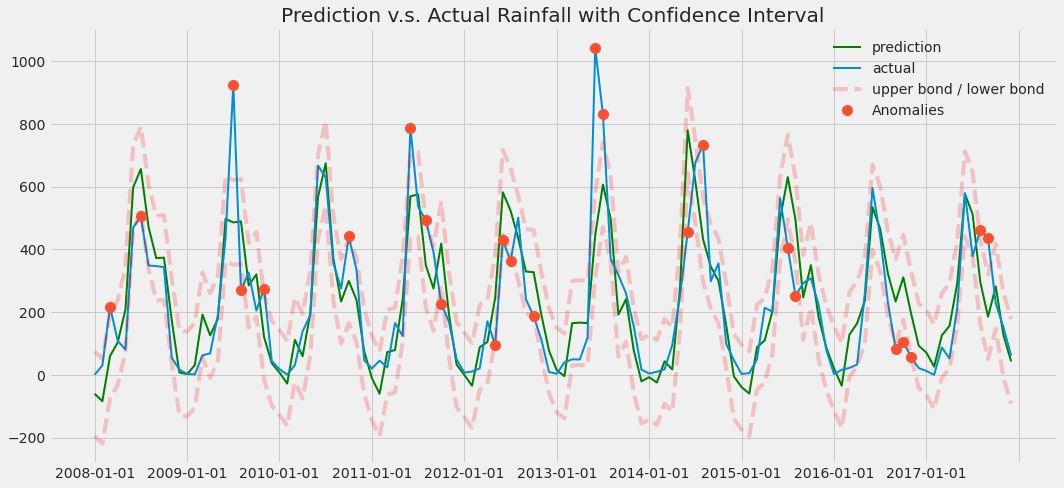

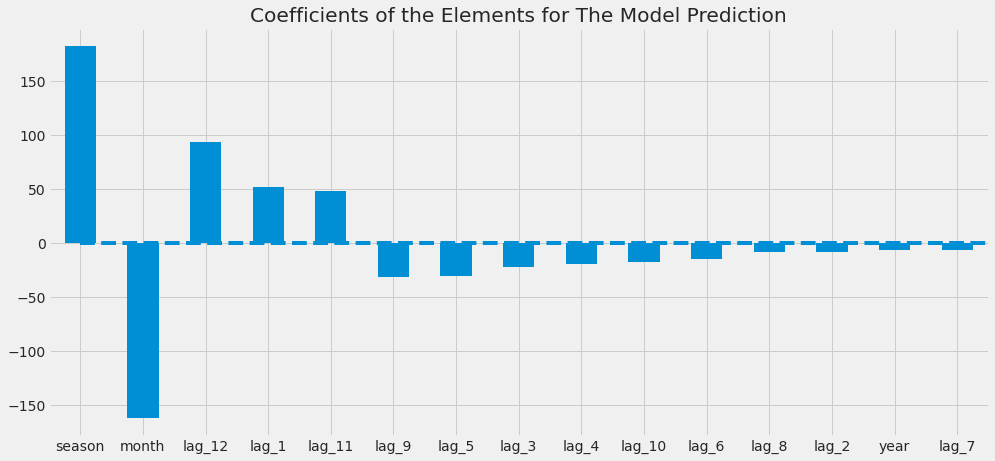

In [41]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=True)
plotCoefficients(lr)

- Ridge

The slope of the coeeficients smoothly goes down in this Rifge model. It seems better than the LinearRegresson model. However, this analysis will keep comparing different models.

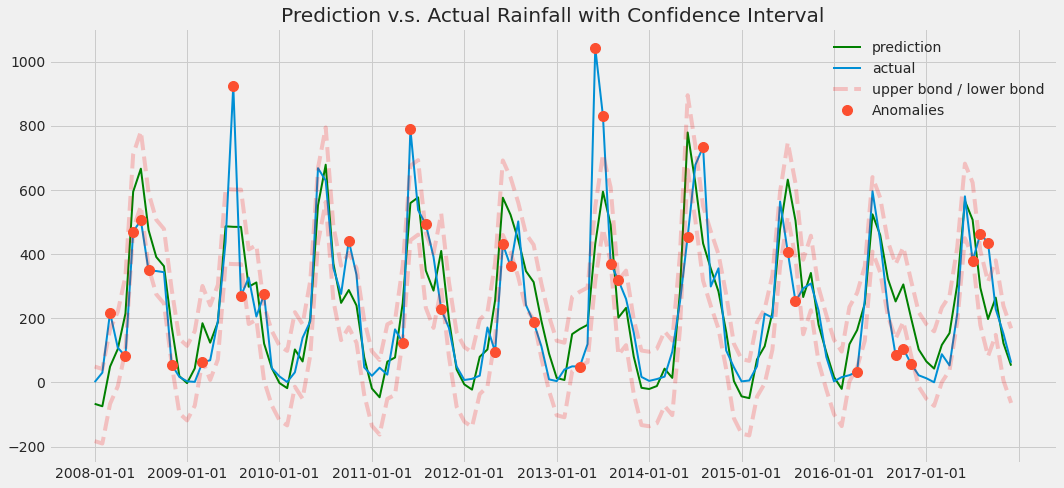

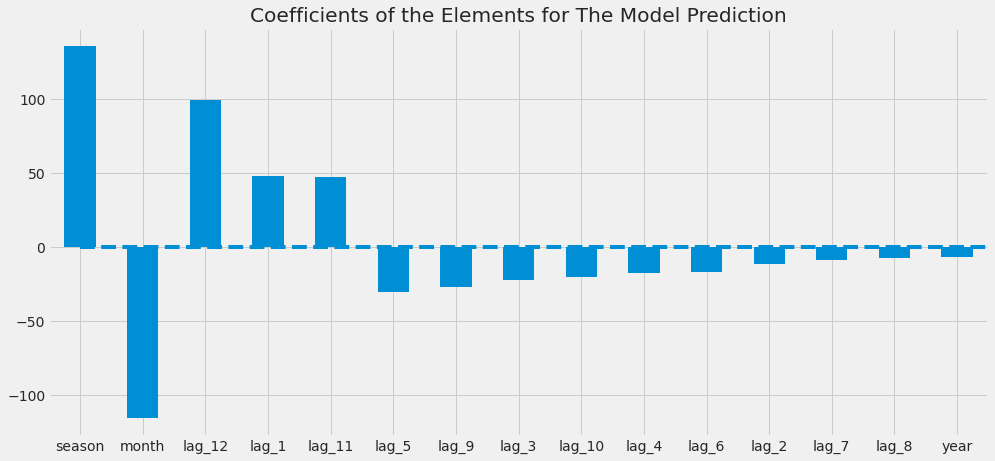

In [42]:
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

- Lasso

It is obvious that lag_12, season, and month factors have higher coefficients in this Lasso model. It still says there is slightly overfitting comparing to the Ridge model.

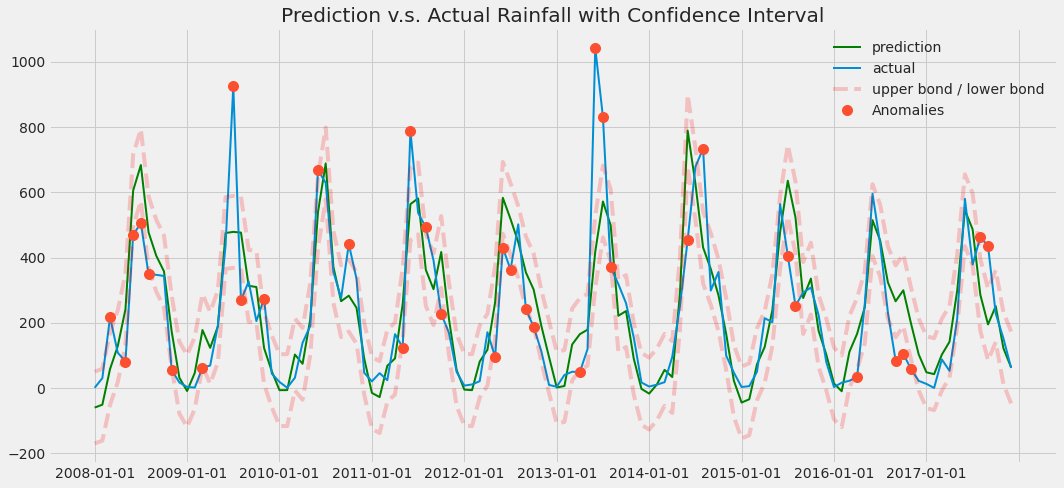

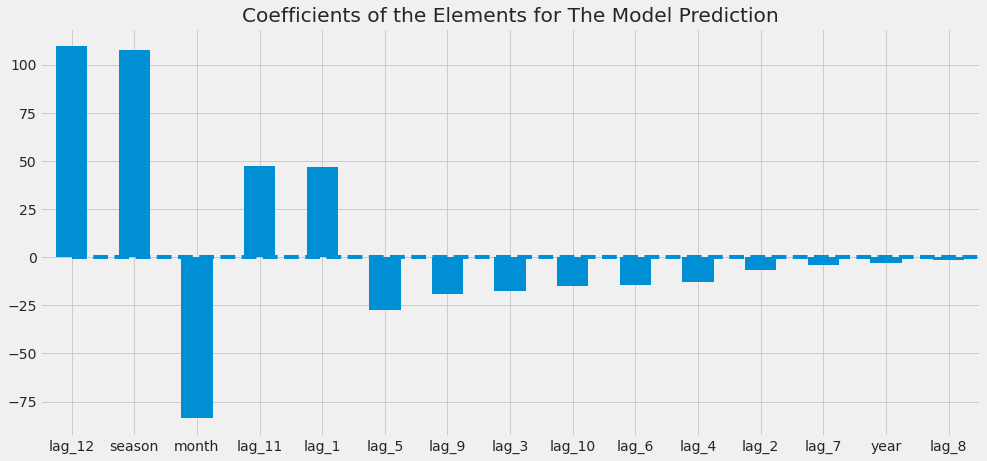

In [43]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

- XGBRegressor

As for XGBRegressor, it does not provide coefficients because it is a tree learner model. Here, we only review the line plot to compare the prediction and the actual rainfall.

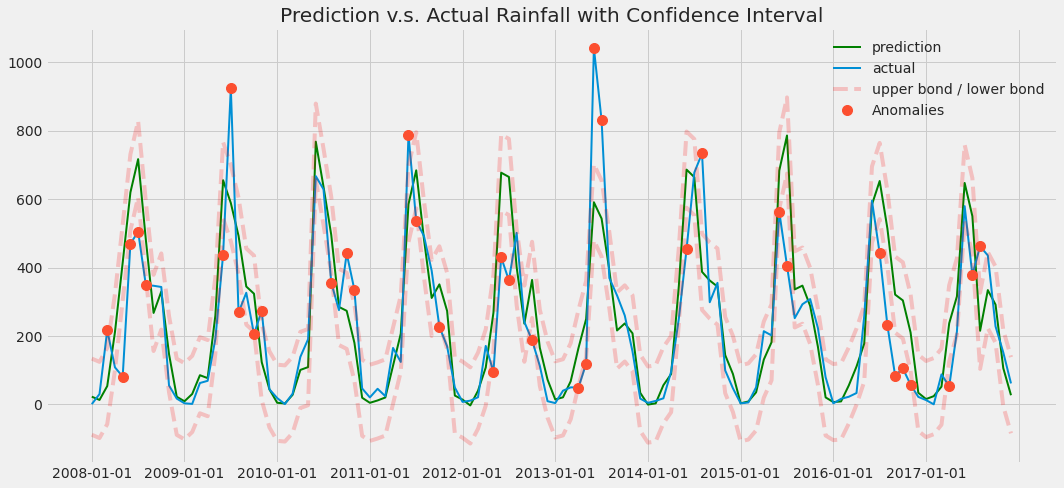

In [44]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

- ElasticNet

The below charts shows lag_12 has a high coefficient. It demonstrates ElasticNet is the model that overfits the most in these 5 regression models so far.

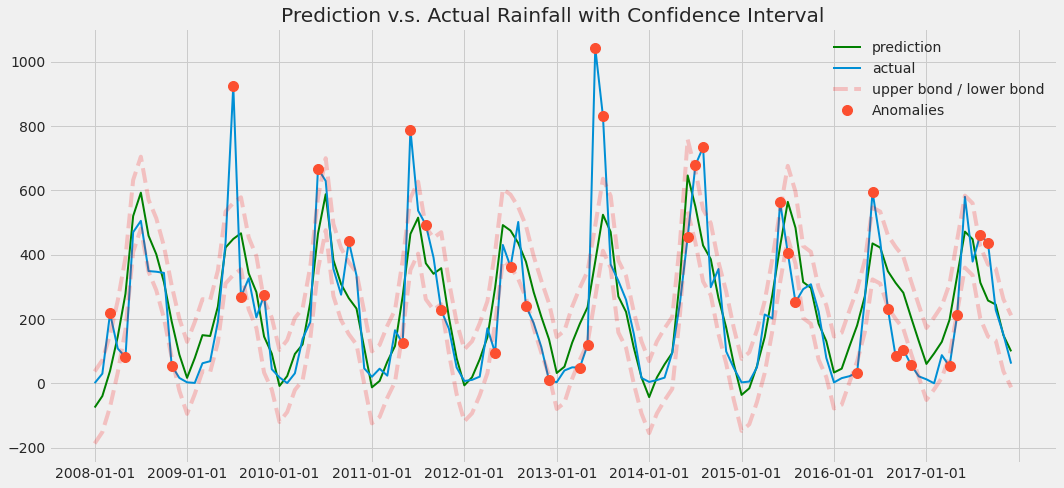

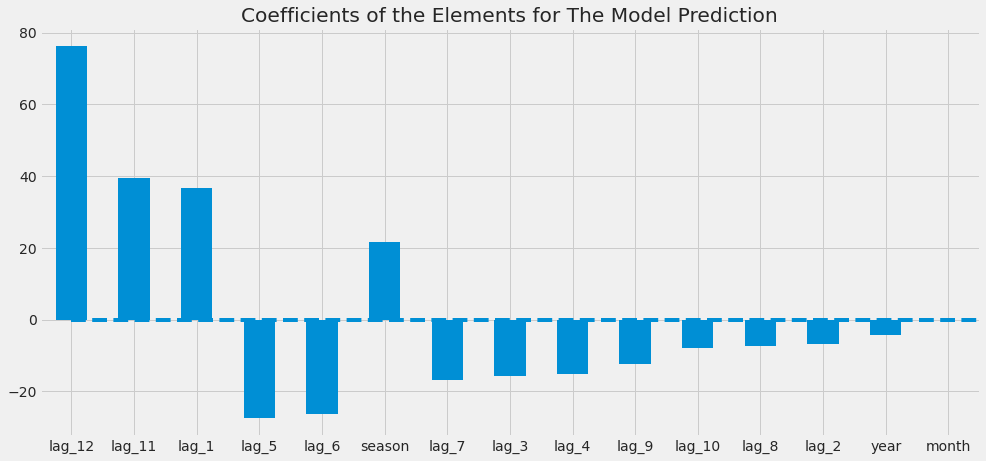

In [45]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train_scaled, y_train)
plotModelResults(en, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(en)

In [46]:
def run_regression(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    me = np.mean(y_pred - y_test)
    mae = np.mean(np.abs(y_pred - y_test))
    mpe = np.mean((y_pred - y_test)/y_test)
    rmse = np.mean((y_pred - y_test)**2)**.5
    corr = np.corrcoef(y_pred, y_test)[0,1]
    print('MAE:', mae)
    print('RMSE:', rmse)
    print('Correlation:', corr)
    
    return mape, me, mae, mpe, rmse, corr

In [47]:
#LinearRegression
print('\nLinearRegression:')
mape_lrs, me_lrs, mae_lrs, mpe_lrs, rmse_lrs, corr_lrs = run_regression(lr, X_train_scaled, y_train, X_test_scaled, y_test)

#Ridge
print('\nRidge:')
mape_rgs, me_rgs, mae_rgs, mpe_rgs, rmse_rgs, corr_rgs = run_regression(ridge, X_train_scaled, y_train, X_test_scaled, y_test)

#Lasso
print('\nLasso:')
mape_lss, me_lss, mae_lss, mpe_lss, rmse_lss, corr_lss = run_regression(lasso, X_train_scaled, y_train, X_test_scaled, y_test)

#XGBRegressor
print('\nXGBRegressor:')
mape_xgbs, me_xgbs, mae_xgbs, mpe_xgbs, rmse_xgbs, corr_xgbs = run_regression(xgb, X_train_scaled, y_train, X_test_scaled, y_test)

#ElasticNet
print('\nElasticNet:')
mape_ens, me_ens, mae_ens, mpe_ens, rmse_ens, corr_ens = run_regression(en, X_train_scaled, y_train, X_test_scaled, y_test)


LinearRegression:
MAE: 89.85005129525784
RMSE: 125.01612606155044
Correlation: 0.8320825973452785

Ridge:
MAE: 89.55546538390534
RMSE: 125.7012419359516
Correlation: 0.829458340070592

Lasso:
MAE: 88.59224669183813
RMSE: 126.90458189889559
Correlation: 0.8258674830214655

XGBRegressor:
MAE: 90.082616819044
RMSE: 131.06038920837722
Correlation: 0.8344098542789102

ElasticNet:
MAE: 91.61320016592556
RMSE: 129.9085812842968
Correlation: 0.8148378584737324


In [48]:
linear_x = ['LinearRegression', 'Ridge', 'Lasso', 'XGBRegressor', 'ElasticNet'] 
linear_mae = [mae_lrs, mae_rgs, mae_lss, mae_xgbs, mae_ens]
linear_rmse = [rmse_lrs, rmse_rgs, rmse_lss, rmse_xgbs, rmse_ens]

linear_mae = [round(num, 2) for num in linear_mae]
linear_rmse = [round(num, 2) for num in linear_rmse]

fig = go.Figure()
fig.add_trace(go.Bar(x=linear_x, y=linear_mae, name='MAE', 
                     marker_color='lightblue', text=linear_mae, 
                     textposition='auto'))
fig.add_trace(go.Bar(x=linear_x, y=linear_rmse, name='RMSE', 
                     marker_color='lightgreen', text=linear_rmse, 
                     textposition='auto'))
fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.update_layout({'showlegend':True})
fig.update_xaxes(
        title_text = "Machine Learning Models",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "Errors",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_layout(title_text="MAE and RMSE to Evaluate the Prediction (The Lower, The Better)", 
                  title_x=0.5, title_y=0.88)
fig.show()

Lastly, these 5 regression models have similar results with closed MAE and RMSE. It seems the XGBRegressor has the lowest MAE and RMSE. However, as mentioned in the previous section, the coefficients of the elements are missing. Thus, it is unknown whether the XGBRegressor overfits or not.

Despite XGBregressor, the Ridge could be the second choice with lower MAE and RMSE. Also, in the previous section, the coefficients in the Ridge model demonstrate a smoothly decreasing slope. Therefore, this analysis would consider Ridge as an ideal regression model for predicting the rainfall in Kerala.

# 5 Conlusion
This analysis aims to select a prediction model for rainfall forecasting. Since Kerala contributes a high amount of agricultural products in India, maximizing the outputs and minimizing the risks of confronting natural disasters are the concern of this analysis.

In general, if the situation has regular seasonal factors, e.g. sales of a retailer, predicting by seasonal factors would get promising results. However, after trying the seasonal factor method, the outcome looks bad due to too many outliers. The R-squared scores are too low to predict the rainfall accurately. Thus, the next step is to use a machine learning method instead.

First of all, this analysis tested 6 classifications as below.

1. GaussianNB
2. Random Forest
3. Logistic Regression
4. Decision Tree
5. LGBM
6. XGBoost

As for a prediction, the worst situation is that the model mispredicts natural disasters, which means selecting a prediction model should consider the false prediction of droughts and floods. After the analysis, LGBM is the ideal model for the prediction in terms of classification. The prediction accuracy is 70.98%, and the false prediction of droughts and floods is the lowest, 8% and 4%.

However, since rainfall is continuously changing records, a time series analysis by using regression models could be the method to get a more accurate prediction. Thus, this analysis uses the below machine learning algorithms to seek a better solution then.

1. LinearRegression
2. Ridge
3. Lasso
4. XGBRegressor
5. ElasticNet

After the evaluation, XGBRegressor contributes a higher correlation between the prediction and the actual rainfall. It seems the XGBRegressor is an ideal regression model to predict. On the flip side, XGBRegressor does not provide the coefficients of the training elements, so it is unclear whether XGBRegressor overfits or not. Thus, this analysis chooses Ridge to be the second option for the rainfall prediction due to better coefficients as well as low MAE and RMSE.

Lastly, here are suggestions for further analysis to potentially improve the prediction.

1. Keep trying other machine learning models to get a better result.
2. Feature optimization to improve the prediction.
3. Finding out the pattern of outliners and then removing them may improve the prediction of regression models.
4. For model users, adjusting the level ranges might get a better result from classification. Also, by comparing the results from classification and regression models, model users may be able to predict a drought month or flood month that we can see the outliners from the line charts generated by regression models.

# 6 Reference¶
Kerala. (n.d.). In Wikipedia. Retrieved on Aug 4, 2021, from https://en.wikipedia.org/wiki/Kerala

Fernando, J. (2021). R-Squared Definition. Investopedia. Retrieved from https://www.investopedia.com/

Deep AI (n.d.). Accuracy in Machine Learning. Retrieved on Aug 4, 2021, from https://deepai.org/machine-learning-glossary-and-terms/accuracy-error-ratea

Data School (2014). Simple guide to confusion matrix terminology. Retrieved from https://www.dataschool.io/

Acharya, S. (2021). What are RMSE and MAE? Towards Data Science. Retrieved from https://towardsdatascience.com/